In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

In [3]:
df_train = pd.read_csv('train.csv', index_col=0)

In [4]:
df_train.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,7,5,856,60,1,3,8,0,548,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,9600,6,8,1262,20,0,3,6,1,460,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,11250,7,5,920,60,1,3,6,1,608,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,9550,7,5,756,70,0,3,7,1,642,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,14260,8,5,1145,60,1,4,9,1,836,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Naveen\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


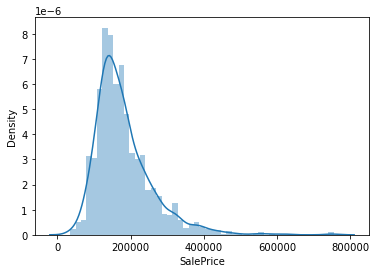

In [6]:
sns.distplot(df_train['SalePrice']);

In [7]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


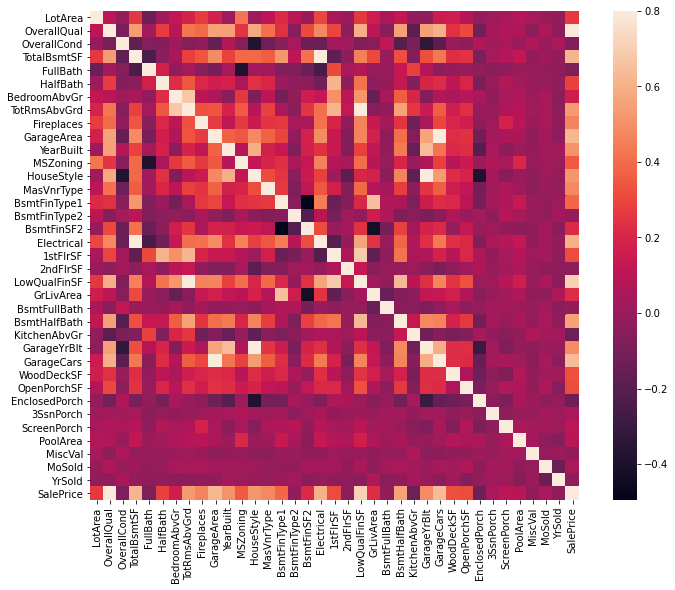

In [8]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

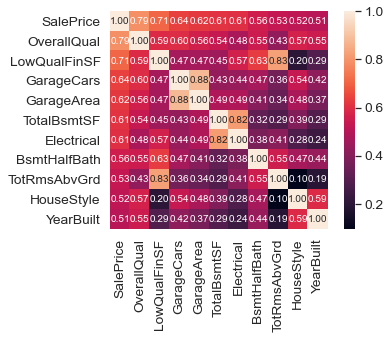

In [22]:
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

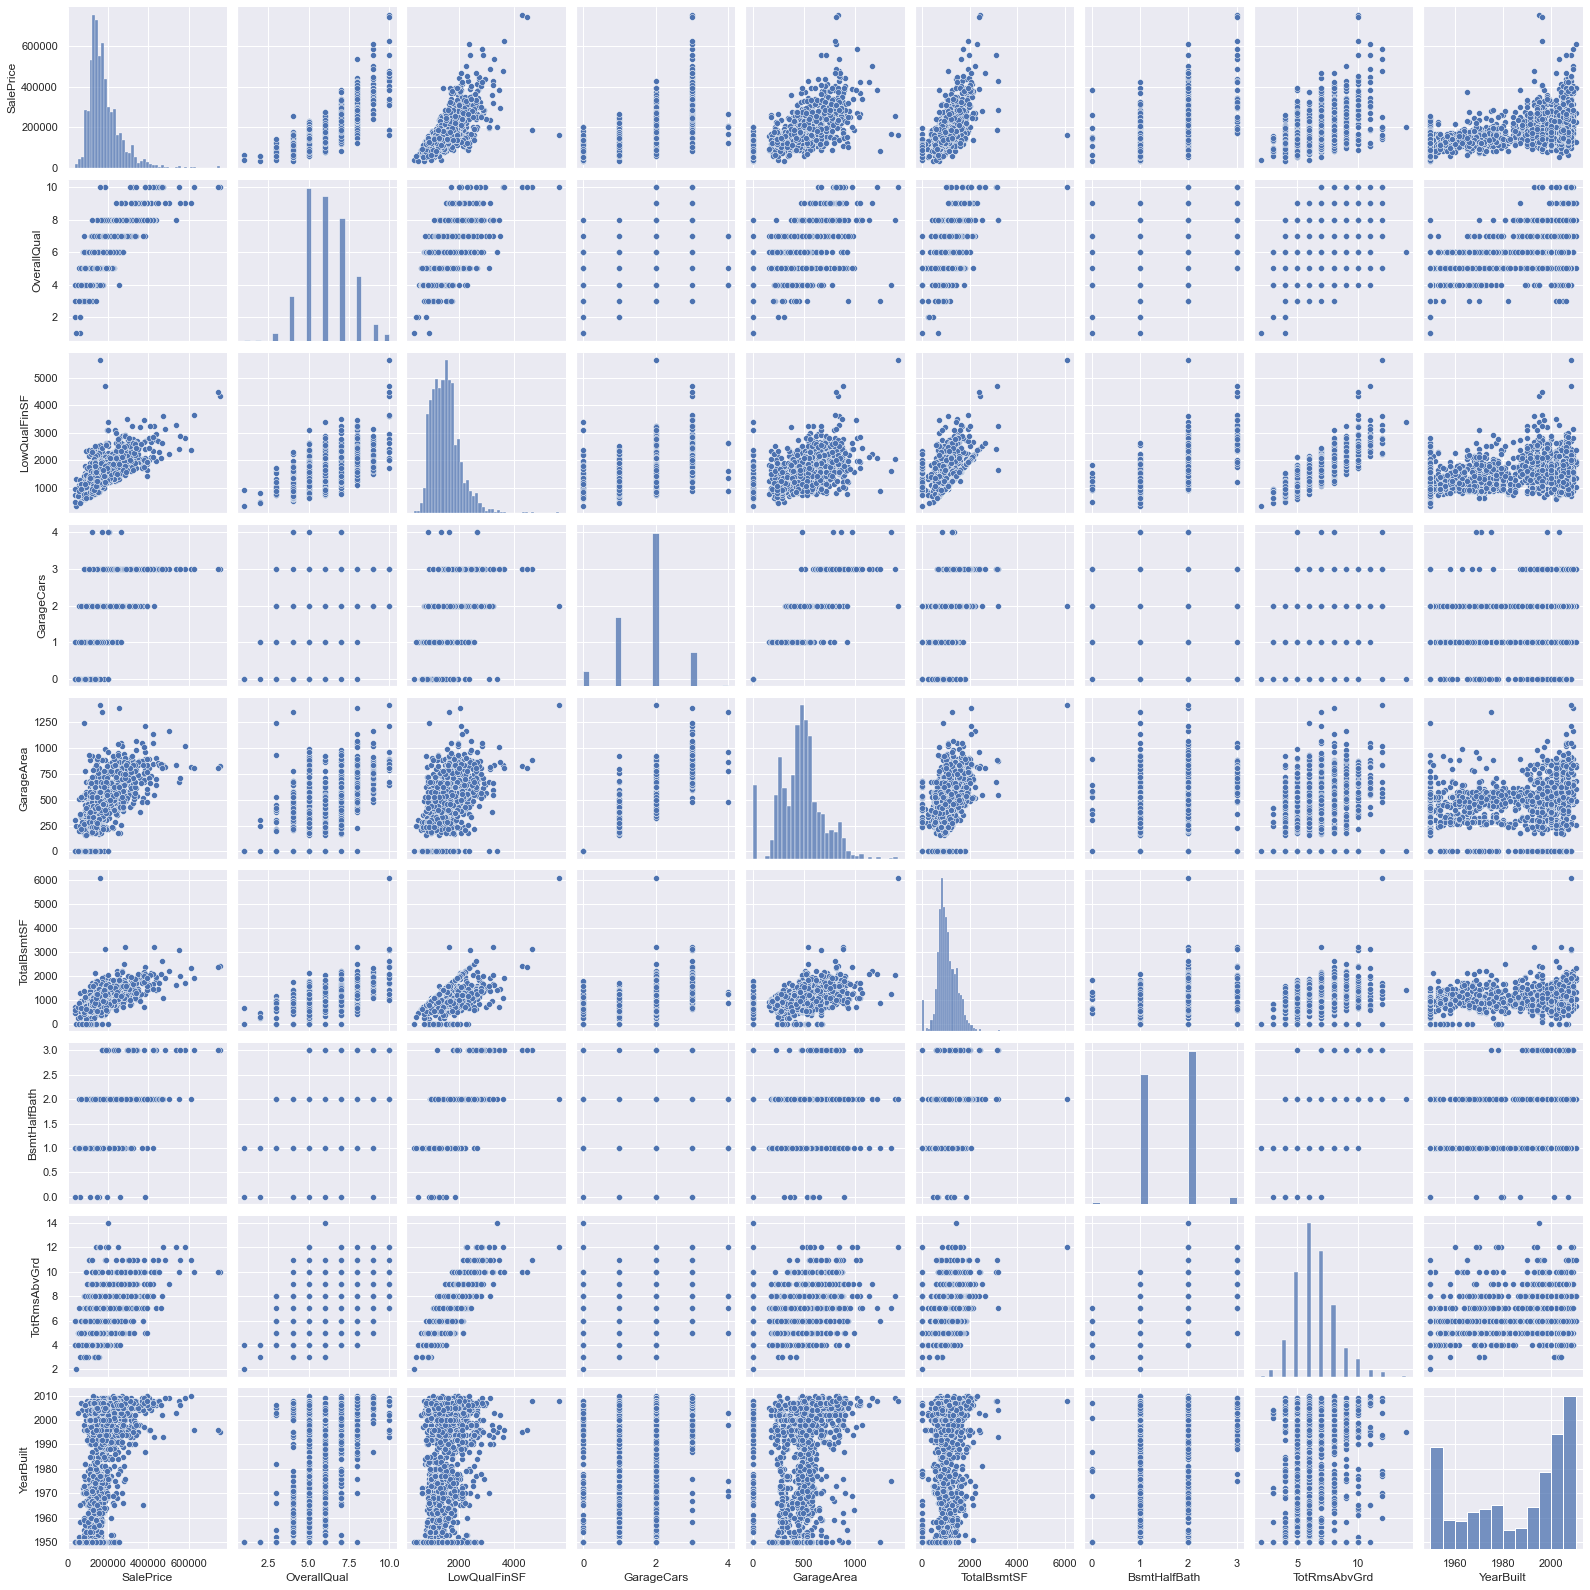

In [23]:
sns.set()
cols = ['SalePrice', 'OverallQual','LowQualFinSF', 'GarageCars','GarageArea', 'TotalBsmtSF', 'BsmtHalfBath','TotRmsAbvGrd','YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

In [24]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Street,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
MSZoning,259,0.177397
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479


In [25]:
df_train = df_train.fillna(df_train.mean())

In [26]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


<ipython-input-26-c710db20a36e>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);


In [27]:
df_train = pd.read_csv('train.csv')

In [28]:
cols = ['SalePrice', 'OverallQual','LowQualFinSF', 'GarageCars','GarageArea', 'TotalBsmtSF', 'BsmtHalfBath','TotRmsAbvGrd','YearBuilt']
df_train = df_train[cols]
# Create dummy values
df_train = pd.get_dummies(df_train)
#filling NA's with the mean of the column:
df_train = df_train.fillna(df_train.mean())
# Always standard scale the data before using NN
scale = StandardScaler()
X_train = df_train[['OverallQual','LowQualFinSF', 'GarageCars','GarageArea', 'TotalBsmtSF', 'BsmtHalfBath','TotRmsAbvGrd','YearBuilt']]
X_train = scale.fit_transform(X_train)
# Y is just the 'SalePrice' column
y = df_train['SalePrice'].values
seed = 7
np.random.seed(seed)
# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.33, random_state=seed)

In [29]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [30]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=32)

Epoch 1/150
31/31 [==============================] - 1s 14ms/step - loss: 37635882752.0000 - mean_absolute_error: 178175.6118 - val_loss: 41088786432.0000 - val_mean_absolute_error: 184176.7656
Epoch 2/150
31/31 [==============================] - 0s 3ms/step - loss: 39202431872.0000 - mean_absolute_error: 182378.3760 - val_loss: 41087205376.0000 - val_mean_absolute_error: 184172.4844
Epoch 3/150
31/31 [==============================] - 0s 3ms/step - loss: 37608332544.0000 - mean_absolute_error: 177917.3252 - val_loss: 41082556416.0000 - val_mean_absolute_error: 184159.6562
Epoch 4/150
31/31 [==============================] - 0s 4ms/step - loss: 38671397760.0000 - mean_absolute_error: 180844.2319 - val_loss: 41069502464.0000 - val_mean_absolute_error: 184123.7188
Epoch 5/150
31/31 [==============================] - 0s 3ms/step - loss: 37184955776.0000 - mean_absolute_error: 176828.6460 - val_loss: 41038249984.0000 - val_mean_absolute_error: 184039.0781
Epoch 6/150
31/31 [===============

31/31 [==============================] - 0s 4ms/step - loss: 6290597376.0000 - mean_absolute_error: 55748.5262 - val_loss: 4474254848.0000 - val_mean_absolute_error: 55447.6602
Epoch 44/150
31/31 [==============================] - 0s 4ms/step - loss: 5308040520.0000 - mean_absolute_error: 54565.1635 - val_loss: 4395051008.0000 - val_mean_absolute_error: 54871.5234
Epoch 45/150
31/31 [==============================] - 0s 3ms/step - loss: 4441492296.0000 - mean_absolute_error: 52966.6781 - val_loss: 4310179328.0000 - val_mean_absolute_error: 54230.3555
Epoch 46/150
31/31 [==============================] - 0s 3ms/step - loss: 5555700480.0000 - mean_absolute_error: 54866.0179 - val_loss: 4224465152.0000 - val_mean_absolute_error: 53578.4922
Epoch 47/150
31/31 [==============================] - 0s 4ms/step - loss: 5422803408.0000 - mean_absolute_error: 52987.6133 - val_loss: 4152965120.0000 - val_mean_absolute_error: 53025.1562
Epoch 48/150
31/31 [==============================] - 0s 3ms/st

31/31 [==============================] - 0s 3ms/step - loss: 2053026896.0000 - mean_absolute_error: 32267.9413 - val_loss: 1967216640.0000 - val_mean_absolute_error: 32479.8652
Epoch 87/150
31/31 [==============================] - 0s 3ms/step - loss: 1965164808.0000 - mean_absolute_error: 32784.7245 - val_loss: 1946985088.0000 - val_mean_absolute_error: 32254.2129
Epoch 88/150
31/31 [==============================] - 0s 3ms/step - loss: 2252933024.0000 - mean_absolute_error: 32595.0270 - val_loss: 1931973760.0000 - val_mean_absolute_error: 32022.3848
Epoch 89/150
31/31 [==============================] - 0s 3ms/step - loss: 1764326872.0000 - mean_absolute_error: 30483.8181 - val_loss: 1908403072.0000 - val_mean_absolute_error: 31753.9785
Epoch 90/150
31/31 [==============================] - 0s 3ms/step - loss: 1636601760.0000 - mean_absolute_error: 30469.2924 - val_loss: 1895657088.0000 - val_mean_absolute_error: 31528.5820
Epoch 91/150
31/31 [==============================] - 0s 3ms/st

31/31 [==============================] - 0s 3ms/step - loss: 1709408966.0000 - mean_absolute_error: 26227.8329 - val_loss: 1572711936.0000 - val_mean_absolute_error: 27091.5996
Epoch 130/150
31/31 [==============================] - 0s 3ms/step - loss: 1550156406.0000 - mean_absolute_error: 26303.4664 - val_loss: 1561914752.0000 - val_mean_absolute_error: 27057.6094
Epoch 131/150
31/31 [==============================] - 0s 3ms/step - loss: 1554008700.0000 - mean_absolute_error: 25848.6777 - val_loss: 1563921408.0000 - val_mean_absolute_error: 27016.3301
Epoch 132/150
31/31 [==============================] - 0s 3ms/step - loss: 1726693092.0000 - mean_absolute_error: 26065.2138 - val_loss: 1565022208.0000 - val_mean_absolute_error: 26986.0215
Epoch 133/150
31/31 [==============================] - ETA: 0s - loss: 1326348544.0000 - mean_absolute_error: 25883.37 - 0s 3ms/step - loss: 1211539556.0000 - mean_absolute_error: 24987.7762 - val_loss: 1548444032.0000 - val_mean_absolute_error: 2693

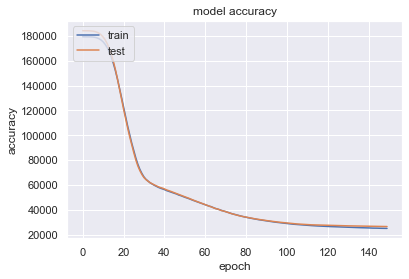

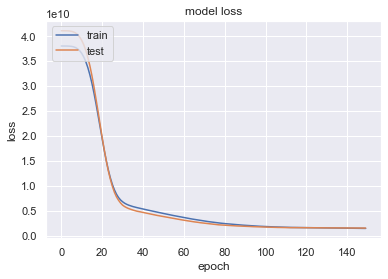

In [32]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()